In this notebook one linear network is trained and evaluated as an example.
The following setups were also tested and saved:

1. model = LinModel( n_inputs= 45*90, nodes_per_layer=[64,16,4], use_dropout=False, use_batchnorm=True)
saved under "trained_models/LinModel_64_16_4_LR_L.pth"
2. model = LinModel( n_inputs= 180*90, nodes_per_layer=[64,16,4], use_dropout=False, use_batchnorm=True)
saved under "trained_models/LinModel_64_16_4_HR_L.pth"
3. model = LinModel( n_inputs= 45*90, nodes_per_layer=[10,10], use_dropout=False, use_batchnorm=True)
saved under "trained_models/LinModel_10_10_LR_L.pth"
4. model = LinModel( n_inputs= 180*90, nodes_per_layer=[10,10], use_dropout=False, use_batchnorm=True)
saved under "trained_models/LinModel_10_10_HR_L.pth"
5. model = LinModel( n_inputs= 45*90, nodes_per_layer=[512,124,32,8], use_dropout=False, use_batchnorm=True)
saved under "trained_models/LinModel_512_124_32_8_LR_L.pth"
6. model = LinModel( n_inputs=180*90, nodes_per_layer=[512,124,32,8], use_dropout=False, use_batchnorm=True)
saved under "trained_models/LinModel_512_124_32_8_HR_L.pth"


In [ ]:
import xarray as xr
import numpy as np
import netCDF4
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn.functional as F
from modules.linear_model import LinModel
from modules.create_dataloader import prepare_datasets
from modules.training import train_model, plot_predictions
from modules.evaluate_model import evaluate_model
import random


/Users/ferdinand/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403251597/work/aten/src/ATen/native/Convolution.cpp:1041.)
  return F.conv2d(input, weight, bias, self.stride,


In [3]:
from modules import *

In [ ]:
# Set device
device = "cpu"
print(device)

cpu


In [7]:
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

# Set a seed value
seed_value = 170
set_seed(seed_value)

### LowRes - 64 16 4

Original data shape: (24, 181, 45, 90)
Reshaped Data shape: (4344, 45, 90)
Repeated years shape: (4344,)
Train DataLoader size: 3040
Validation DataLoader size: 652
Test DataLoader size: 652
Train x mean, x std: tensor(278.5204) tensor(20.6051)
Train y mean, y std: tensor(2009.1237) tensor(51.9506)
Validation x mean, x std: tensor(278.5204) tensor(20.6051)
Validation y mean, y std: tensor(2009.1237) tensor(51.9506)
Test x mean, x std: tensor(278.5204) tensor(20.6051)
Test y mean, y std: tensor(2009.1237) tensor(51.9506)
Y min, max: 1920 2100
Input shape: torch.Size([64, 45, 90])
Target shape: torch.Size([64, 1])
tensor(-0.0986)


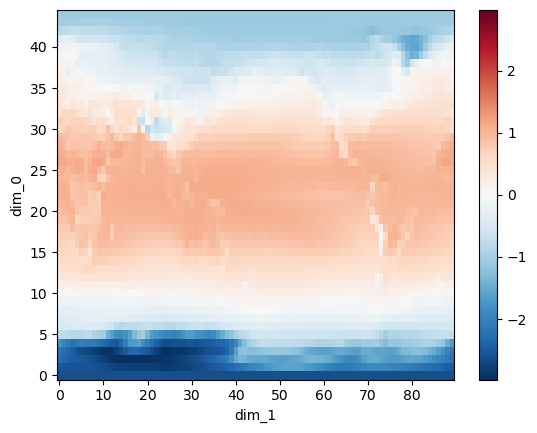

tensor(2004.)


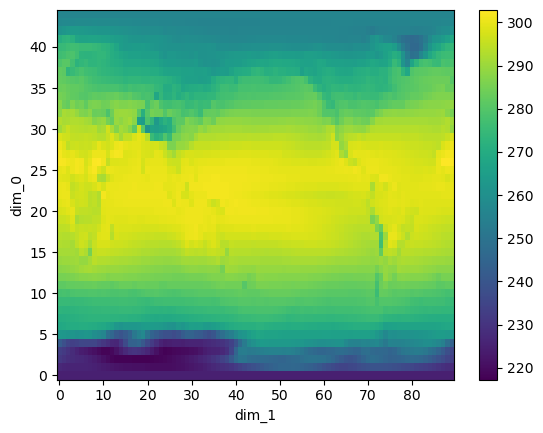

  8%|▊         | 79/1000 [00:16<03:13,  4.76it/s]

Early stopping at epoch 79
Best model saved to LinModel_64_16_4_LR_L.pth


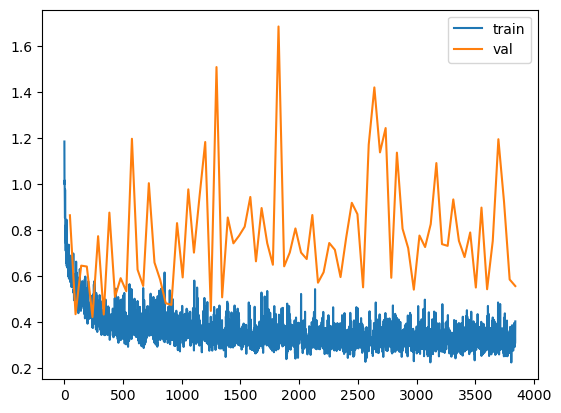

R2:  0.8348664876138241
MSE:  0.18026844
RMSE:  0.4245803
MSR years:  486.52002
RMSE years:  22.0572
Pearson correlation and p-vale:  0.9205071582893917 1.7699209273127697e-267
Spearman correlation and p-value:  0.8808082126740393 3.106470760724018e-213
R2:  0.8195157221257521
MSE:  0.17518032
RMSE:  0.41854548
MSR years:  472.7878
RMSE years:  21.743685
Pearson correlation and p-vale:  0.9175369250388341 1.6166929666440603e-262
Spearman correlation and p-value:  0.9219710413910285 5.386951480829255e-270


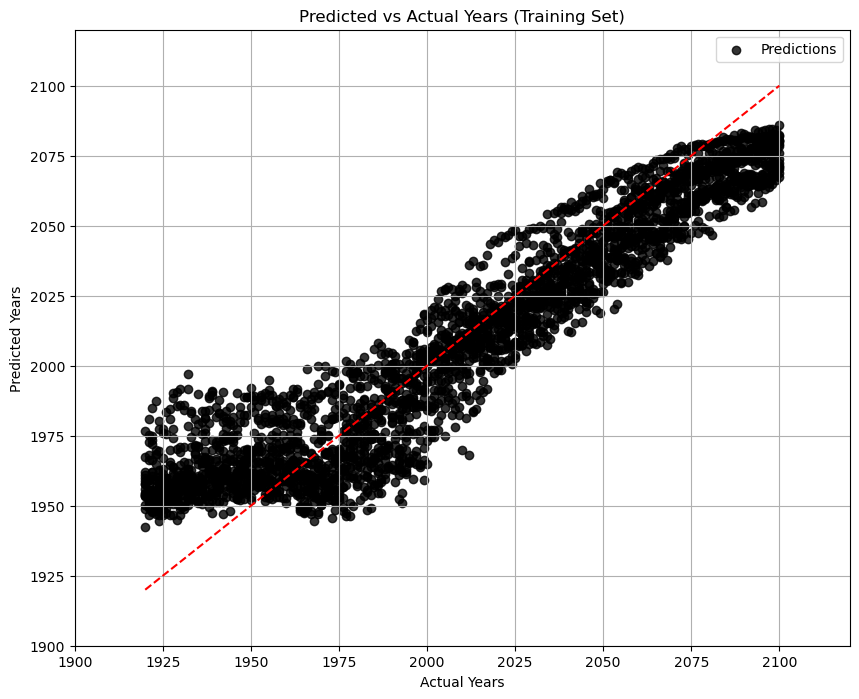

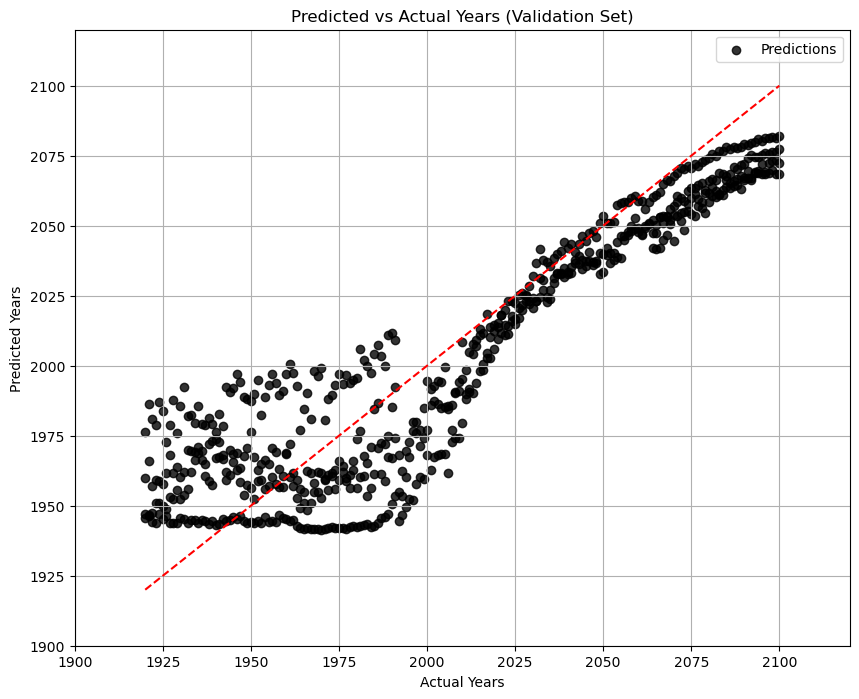

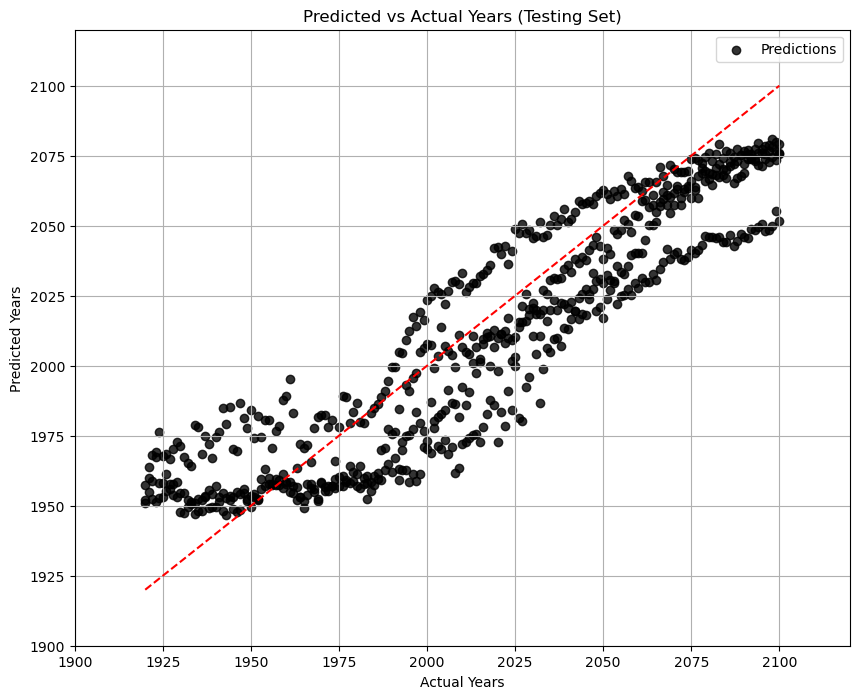

In [18]:
# Load the NetCDF file using netCDF4
file_path = 'Data/combined_dataset_LR.nc'

# Prepare datasets and loader
train_loader, val_loader, test_loader, train_x_stats, train_y_stats, val_x_stats, val_y_stats, test_x_stats, test_y_stats = prepare_datasets_L(file_path, batch_size=64, train_ratio=0.7, val_ratio=0.15, shuffle = True, info=True)

# Initialize model
model = LinModel( n_inputs= 45*90, nodes_per_layer=[64,16,4], use_dropout=False, use_batchnorm=True)

trained_model, loss_vals, val_loss_vals = train_model(model, train_loader, val_loader, device, "trained_models/LinModel_64_16_4_LR_L.pth", learning_rate=1e-2, patience=75, min_delta=0.001, min_epochs=50, n_epochs=1000, l2_lambda=1e-2, use_l2_reg=True, info=True)

# Evaluate model
r2, mse, pearson_corr = evaluate_model(trained_model, val_loader, val_y_stats, device, info=True)
# Evaluate model

r2, mse, pearson_corr = evaluate_model(trained_model, test_loader, test_y_stats, device, info=True)
# Plot predictions

# Plot for training set
plot_predictions(trained_model, device,  train_loader, train_y_stats, "Predicted vs Actual Years (Training Set)")

# Plot for validation set
plot_predictions(trained_model ,device, val_loader, val_y_stats, "Predicted vs Actual Years (Validation Set)")

# Plot for testing set
plot_predictions(trained_model, device, test_loader, test_y_stats, "Predicted vs Actual Years (Testing Set)")

Model loaded from LinModel_64_16_4_LR_L.pth
R2:  0.8348650314704602
MSE:  0.18027003
RMSE:  0.42458218
MSR years:  486.52435
RMSE years:  22.057297
Pearson correlation and p-vale:  0.9205055682267335 1.780988040252048e-267
Spearman correlation and p-value:  0.8808082126740393 3.106470760724018e-213
R2:  0.8195173630492986
MSE:  0.17517872
RMSE:  0.41854358
MSR years:  472.78366
RMSE years:  21.74359
Pearson correlation and p-vale:  0.9175360563420661 1.6220001475597534e-262
Spearman correlation and p-value:  0.9219710413910285 5.386951480829255e-270


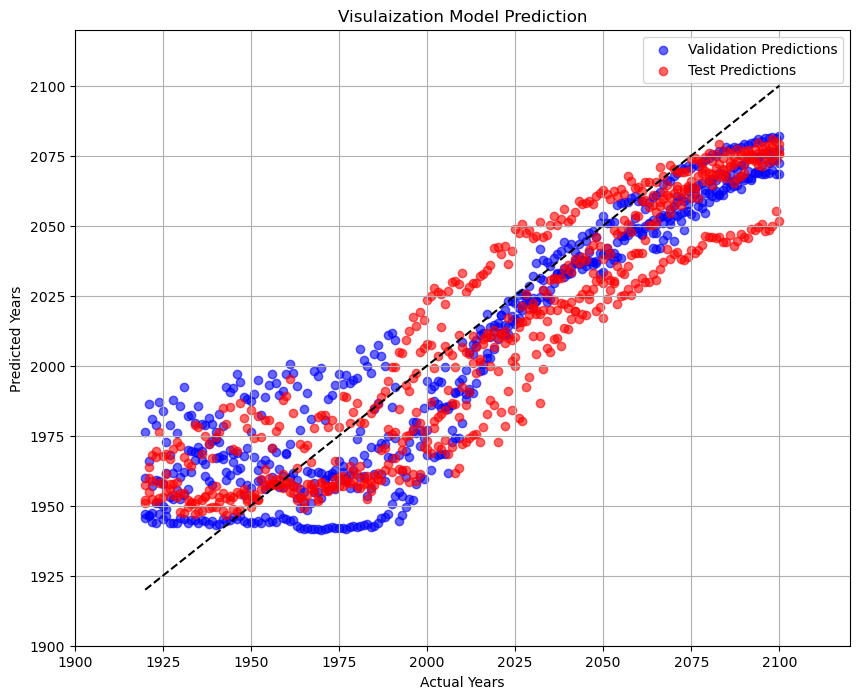

In [19]:
device = torch.device("cpu")

# Load the NetCDF file using netCDF4
file_path = 'Data/combined_dataset_LR.nc'

# Prepare datasets and loader
train_loader, val_loader, test_loader, train_x_stats, train_y_stats, val_x_stats, val_y_stats, test_x_stats, test_y_stats = prepare_datasets_L(file_path, batch_size=128, train_ratio=0.7, val_ratio=0.15, shuffle = True, info=False)

# Initialize model
Model = LinModel( n_inputs= 45*90, nodes_per_layer=[64,16,4], use_dropout=False, use_batchnorm=True)

checkpoint_path = 'trained_models/LinModel_64_16_4_LR_L.pth'

checkpoint = torch.load(checkpoint_path)
Model.load_state_dict(checkpoint['vis_model_state_dict'])

print('Model loaded from', checkpoint_path)

Model.eval()

# Evaluate the model
r2, mse, pearson_corr = evaluate_model(Model, val_loader, val_y_stats, device, info=True)

# Evaluate the model
r2, mse, pearson_corr = evaluate_model(Model, test_loader, test_y_stats, device, info=True)
